# <p style="padding:20px;background-color:#FFDEAD;margin:0;color:(0,0,0);font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">Application of Machine Learning Models to predict Credit Risk</p>

Thẻ tín dụng (**Credit card**) nói chung là loại thẻ được cấp cho khách hàng (chủ thẻ), thường cho phép họ mua hàng hóa, dịch vụ trong hạn mức tín dụng hoặc rút tiền mặt trước. Thẻ tín dụng cung cấp cho chủ thẻ lợi thế về thời gian, nghĩa là nó cung cấp thời gian để khách hàng của họ trả nợ sau trong một thời gian quy định, bằng cách mang nó sang chu kỳ thanh toán tiếp theo.

Gian lận thẻ tín dụng (**Credit card frauds**) là mục tiêu dễ dàng. Không có bất kỳ rủi ro nào, một số tiền đáng kể có thể được rút ra mà chủ sở hữu không hề hay biết trong thời gian ngắn. Những kẻ lừa đảo luôn cố gắng làm cho mọi giao dịch gian lận trở nên hợp pháp, điều này khiến cho việc phát hiện gian lận trở nên rất khó khăn và khó phát hiện.

Trong năm 2017, có 1.579 vụ vi phạm dữ liệu và gần 179 triệu hồ sơ, trong đó gian lận thẻ tín dụng là hình thức phổ biến nhất với 133.015 báo cáo, sau đó là gian lận liên quan đến việc làm hoặc thuế với 82.051 báo cáo, lừa đảo qua điện thoại với 55.045 báo cáo, tiếp theo là lừa đảo ngân hàng với 50.517 báo cáo từ số liệu thống kê do FTC ([Federal Trade Commission](https://www.ftc.gov/news-events/news/press-releases/2019/02/imposter-scams-top-complaints-made-ftc-2018)) công bố.

Với các hành vi gian lận khác nhau, chủ yếu là gian lận thẻ tín dụng, thường xuất hiện trên các bản tin trong vài năm qua, gian lận luôn nằm trong tâm trí của hầu hết dân số thế giới. Tập dữ liệu thẻ tín dụng rất mất cân bằng vì sẽ có nhiều giao dịch hợp pháp hơn khi so sánh với giao dịch gian lận.

Bài viết tham khảo: https://www.sciencedirect.com/science/article/pii/S187705092030065X

### About Dataset:
**Link dataset:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Bộ dữ liệu chứa các giao dịch được thực hiện bằng thẻ tín dụng vào tháng 9 năm 2013 bởi chủ thẻ châu Âu.
Bộ dữ liệu này trình bày các giao dịch xảy ra trong hai ngày, trong đó dataset có 492 vụ gian lận trong tổng số 284.807 giao dịch. Bộ dữ liệu rất mất cân bằng, positive class (frauds) chiếm 0,172% trong tất cả các giao dịch.

Dataset chỉ chứa các biến số đầu vào là kết quả của phép biến đổi PCA. Tuy nhiên, do vấn đề bảo mật, cho nên dataset không thể cung cấp các tính năng ban đầu và thông tin cơ bản khác về dữ liệu. Các tính năng V1, V2, … V28 là các thành phần chính có được với PCA, các tính năng duy nhất chưa được chuyển đổi với PCA là 'Time' và 'Amount'. 
+ Feature 'Time' chứa số giây đã trôi qua giữa mỗi giao dịch và giao dịch đầu tiên trong bộ dữ liệu. 
+ Feature 'Amount' là Số tiền giao dịch.

Với tỷ lệ mất cân bằng của lớp, một đề xuất được đưa ra đó là nên đo độ chính xác bằng cách sử dụng Area Under the Precision-Recall Curve (AUPRC). Độ chính xác của ma trận nhầm lẫn (Confusion matrix) không có ý nghĩa đối với phân loại không cân bằng (unbalanced classification).


<a class="anchor" id="0.1"></a>
### Table of Contents
+ [**1. Load data**](#1)
    + [1.1 Import the libraries](#1.1)
    + [1.2 Load the dataset](#1.2)
+ [**2. Exploratory Data Analysis (EDA)**](#2)
    + [2.1 Understanding dataset](#2.1)
    + [2.2 Checking Missing and Outlier Values](#2.2)
    + [2.3 Data Visualization](#2.3)
+ [**3. Data Transformation**](#3)
    + [3.1 Feature Selection](#3.1)
    + [3.2 Imbalanced Data](#3.2)
    + [3.3 Splitting and training](#3.3)
+ [**4. Model building**](#4)
    + [4.1 Logisitc Regression](#4.1)
    + [4.2 Naive Bayes](#4.2)
    + [4.3 KNN](#4.3)
    + [4.4 Decision Tree](#4.4)
    + [4.5 Random Forest](#4.5)
    + [4.6 SVM](#4.6)
    + [4.7 XG Boost](#4.7)
    + [4.8 CatBoost](#4.8)
    + [4.9 AdaBoost](#4.9)
    + [4.10 ANN](#4.10)
+ [**5. Result**](#5)
+ [**6. Conclusions**](#6)

<a class="anchor" id="1"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">1. LOAD DATA</p>
[**Table of Contents**](#0.1)

### 1.1 Import the libraries <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.2 Load the dataset <a class="anchor" id="1.2"></a>

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Xem 5 dòng đầu
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Xem 5 dòng cuối
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<a class="anchor" id="2"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">2. EXPLORATORY DATA ANALYSIS (EDA)</p>
[**Table of Contents**](#0.1)

### 2.1 Understanding dataset <a class="anchor" id="2.1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**Nhận xét:** Cho biết các thông tin thống kê cơ bản như `mean`, `std`, `min`, `max` và các phân vị.

In [7]:
data.shape

(284807, 31)

**Nhận xét tổng quan về dataset:**
+ Dataset gồm có 284807 dòng và 31 cột.
+ Không có giá trị null trong dữ liệu.

### 2.2 Checking Missing and Outlier Values <a class="anchor" id="2.2"></a>

In [8]:
# Check missing values
data.isnull().values.sum()

0

In [9]:
# Checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# percentage of null values
percent_missing = (data.isnull().sum().sort_values(ascending = False)/len(data))*100
print(percent_missing)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64


**Nhận xét:** Không có giá trị `null` trong dataset.

In [11]:
# Check if there are any duplicate rows
data.duplicated(keep=False).sum()

1854

In [12]:
# # delete duplicate rows 
# data = data.drop_duplicates() 

**Nhận xét:** Có 1854 giống nhau.

### 2.3 Data Visualization <a class="anchor" id="2.3"></a>

In [13]:
data["Class"].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

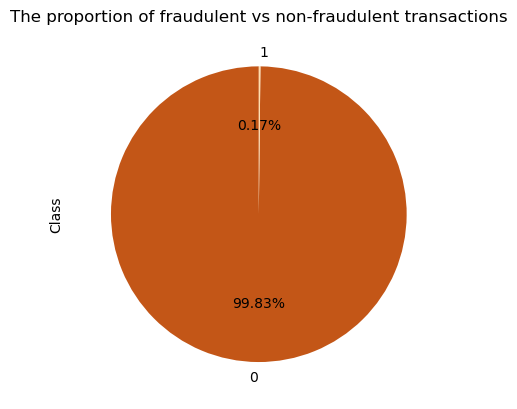

0    284315
1       492
Name: Class, dtype: int64


In [14]:
plt.title('The proportion of fraudulent vs non-fraudulent transactions')
data['Class'].value_counts().plot(kind='pie', autopct="%.2f%%", 
                                        startangle = 90, colors = ['#C35617', '#FFDEAD'])
plt.show();
print(data.Class.value_counts())

**Nhận xét:** Từ biểu đồ trên, ta thấy Target `Class` có:
+ **0.17%** thuộc 1 (gian lận thẻ tín dụng hay **Credit card fraud detection**).
+ **99.83%** thuộc 0 (không gian lận thẻ tín dụng hay **Not Credit card fraud detection**).

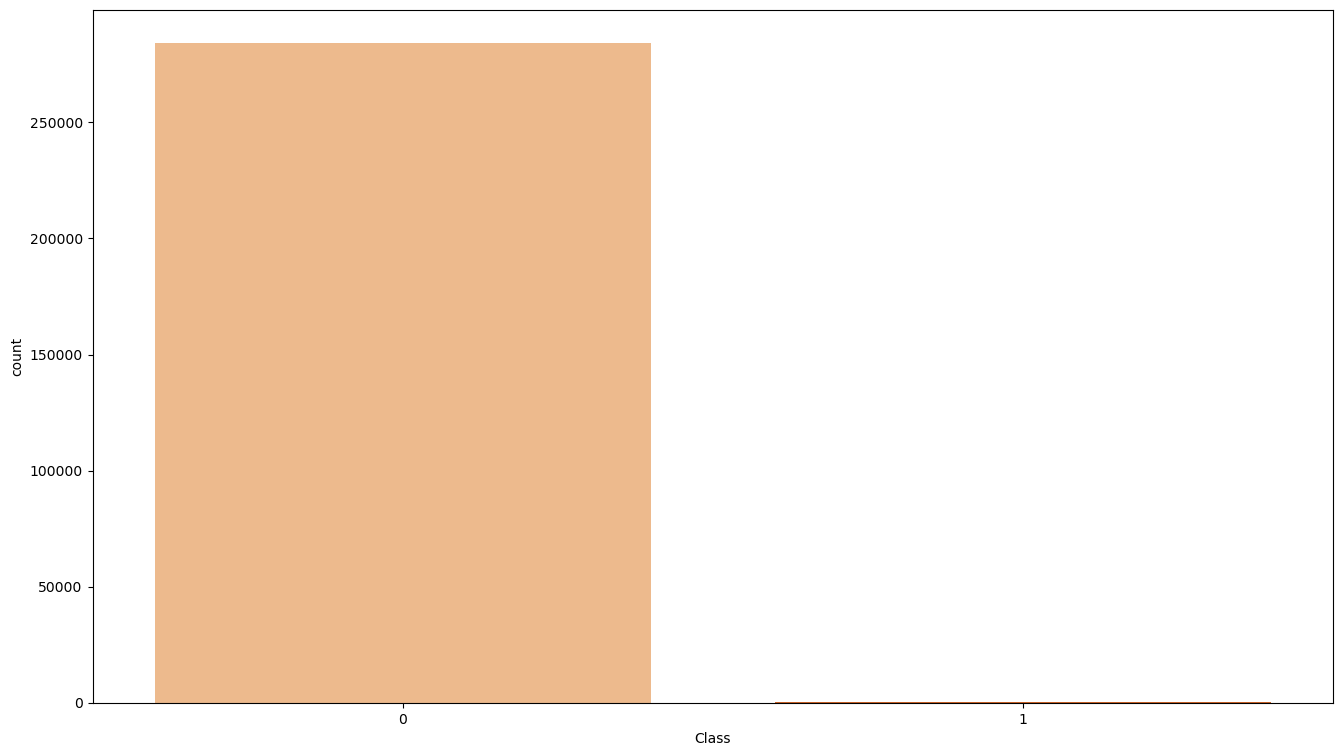

0    284315
1       492
Name: Class, dtype: int64


In [15]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Class', data = data, palette = 'Oranges')
plt.show();

print(data['Class'].value_counts())

**Nhận xét:** 
+ Class: không gian lận thẻ tín dụng (0 = 284315) và gian lận thẻ tín dụng (1 = 492).
+ Data là dạng **Imbalanced**.

<a class="anchor" id="3"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">3. DATA TRANSFORMATION</p>

[**Table of Contents**](#0.1)

### 3.1 Feature Selection <a class="anchor" id="3.1"></a>

In [16]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [17]:
corr_matrix = data.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='Oranges')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [18]:
cor_target = data.corrwith(data["Class"])
cor_target.sort_values(axis = 0, ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64

### Outliers treatment
Trong Project này, tôi không thực hiện bất kỳ xử lý ngoại lệ nào cho tập dữ liệu này. Bởi vì tất cả các cột đã được chuyển đổi PCA, giả định rằng các giá trị ngoại lai được xử lý trong khi chuyển đổi dữ liệu.


**Quan sát sự phân bố của các lớp theo thời gian**

In [19]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

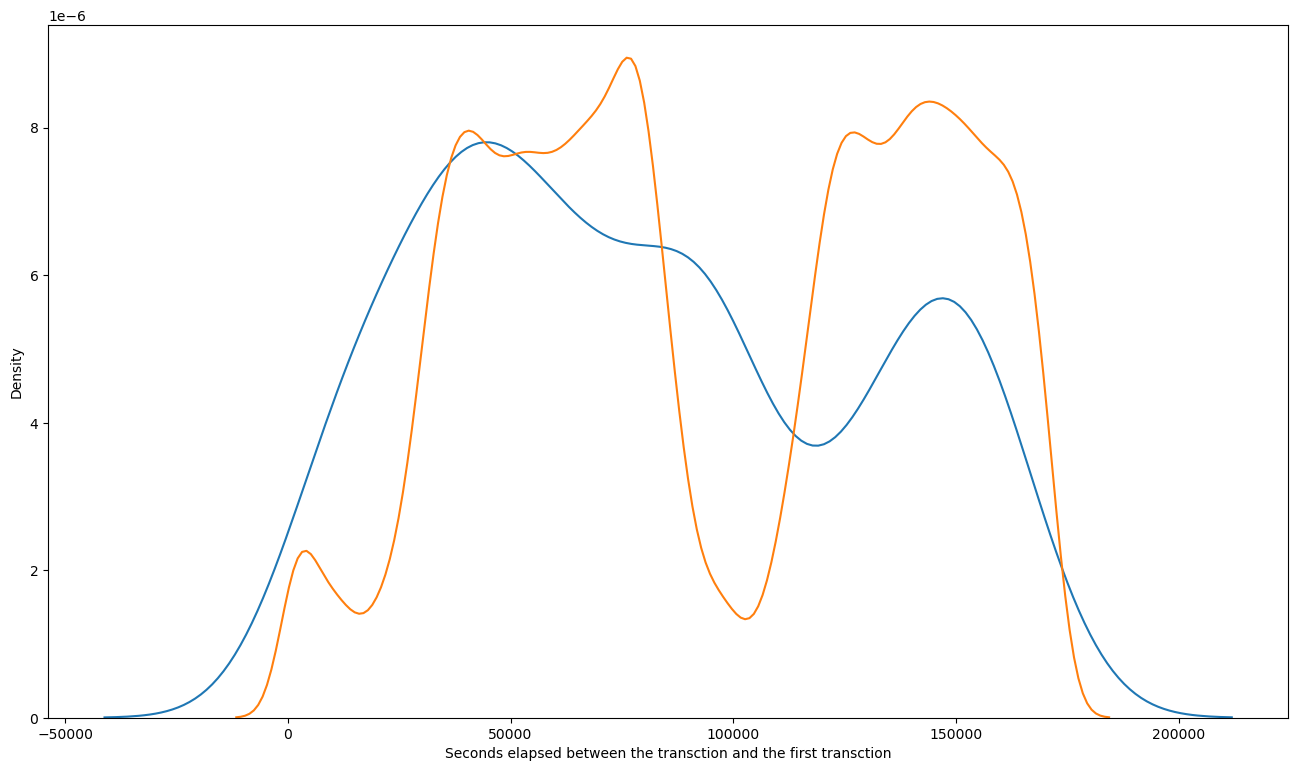

In [20]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.show();

**Nhận xét:** Tôi không thấy bất kỳ mô hình cụ thể nào cho các giao dịch gian lận và không gian lận đối với Thời gian - `Time`. Do đó, chúng ta có thể bỏ cột `Time`.

In [21]:
# Dropping the Time column
data.drop('Time', axis=1, inplace=True)

**Quan sát sự phân bố của các lớp với amount**

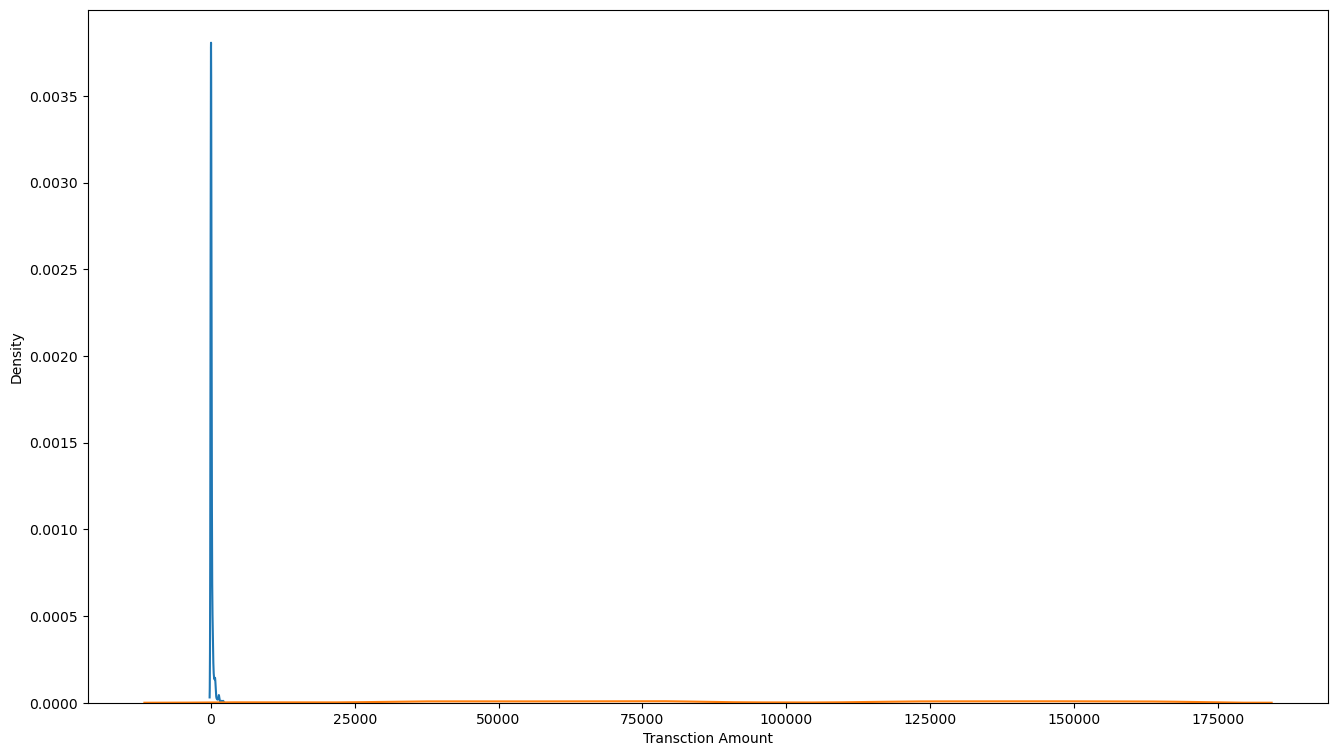

In [22]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Amount'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel='Transction Amount')
plt.show();

**Nhận xét:** Chúng ta có thể thấy rằng các giao dịch gian lận chủ yếu tập trung ở phạm vi số lượng thấp hơn, trong khi các giao dịch không gian lận trải rộng trong phạm vi số lượng từ thấp đến cao.

### 3.2 Imbalanced Data <a class="anchor" id="3.2"></a>

**Using Over-Sampling for Imbalanced Data**

In [23]:
# Using SMOTE method to over sample the data
from imblearn.over_sampling import SMOTE

sm = SMOTE()

dataset_dummy = pd.get_dummies(data, drop_first=True)

X = dataset_dummy.drop(["Class"],axis=1)
y = dataset_dummy['Class']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((568630, 29), (568630,))

In [24]:
# Using SMOTE method to over sample the data
x, y = data.drop('Class', axis=1), data['Class']
x.shape, y.shape

((284807, 29), (284807,))

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x,y)

In [26]:
x.shape, y.shape

((568630, 29), (568630,))

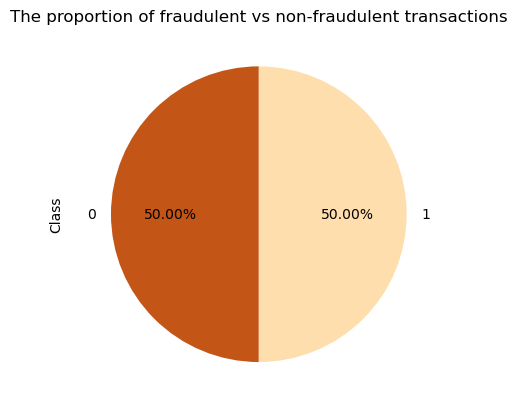

In [27]:
plt.title('The proportion of fraudulent vs non-fraudulent transactions')
y.value_counts().plot(kind='pie', autopct="%.2f%%", 
                      startangle = 90, colors = ['#C35617', '#FFDEAD'])
plt.show();

**Nhận xét:** Sau khi điều chỉnh, dữ liệu trở thành dạng **Balance**.

### 3.3 Splitting and training <a class="anchor" id="3.3"></a>

In [28]:
X = data.drop('Class', axis=1)
y = data['Class']

In [29]:
from sklearn.model_selection import train_test_split
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                            data.drop(labels=['Class'], axis=1),
                                            data['Class'],
                                            test_size=0.3,
                                            random_state=0)

In [30]:
X_train.shape, X_test.shape

((199364, 29), (85443, 29))

In [31]:
y_train.shape, y_test.shape

((199364,), (85443,))

### Feature Scaling
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [32]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [33]:
# Instantiate the Scaler
scaler = StandardScaler()

In [34]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [35]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211


Scaling the test set We don't fit scaler on the test set. We only transform the test set.

In [36]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,-0.197752
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.352239
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.029794
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.891218
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.339968


**Checking the Skewness**

In [37]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

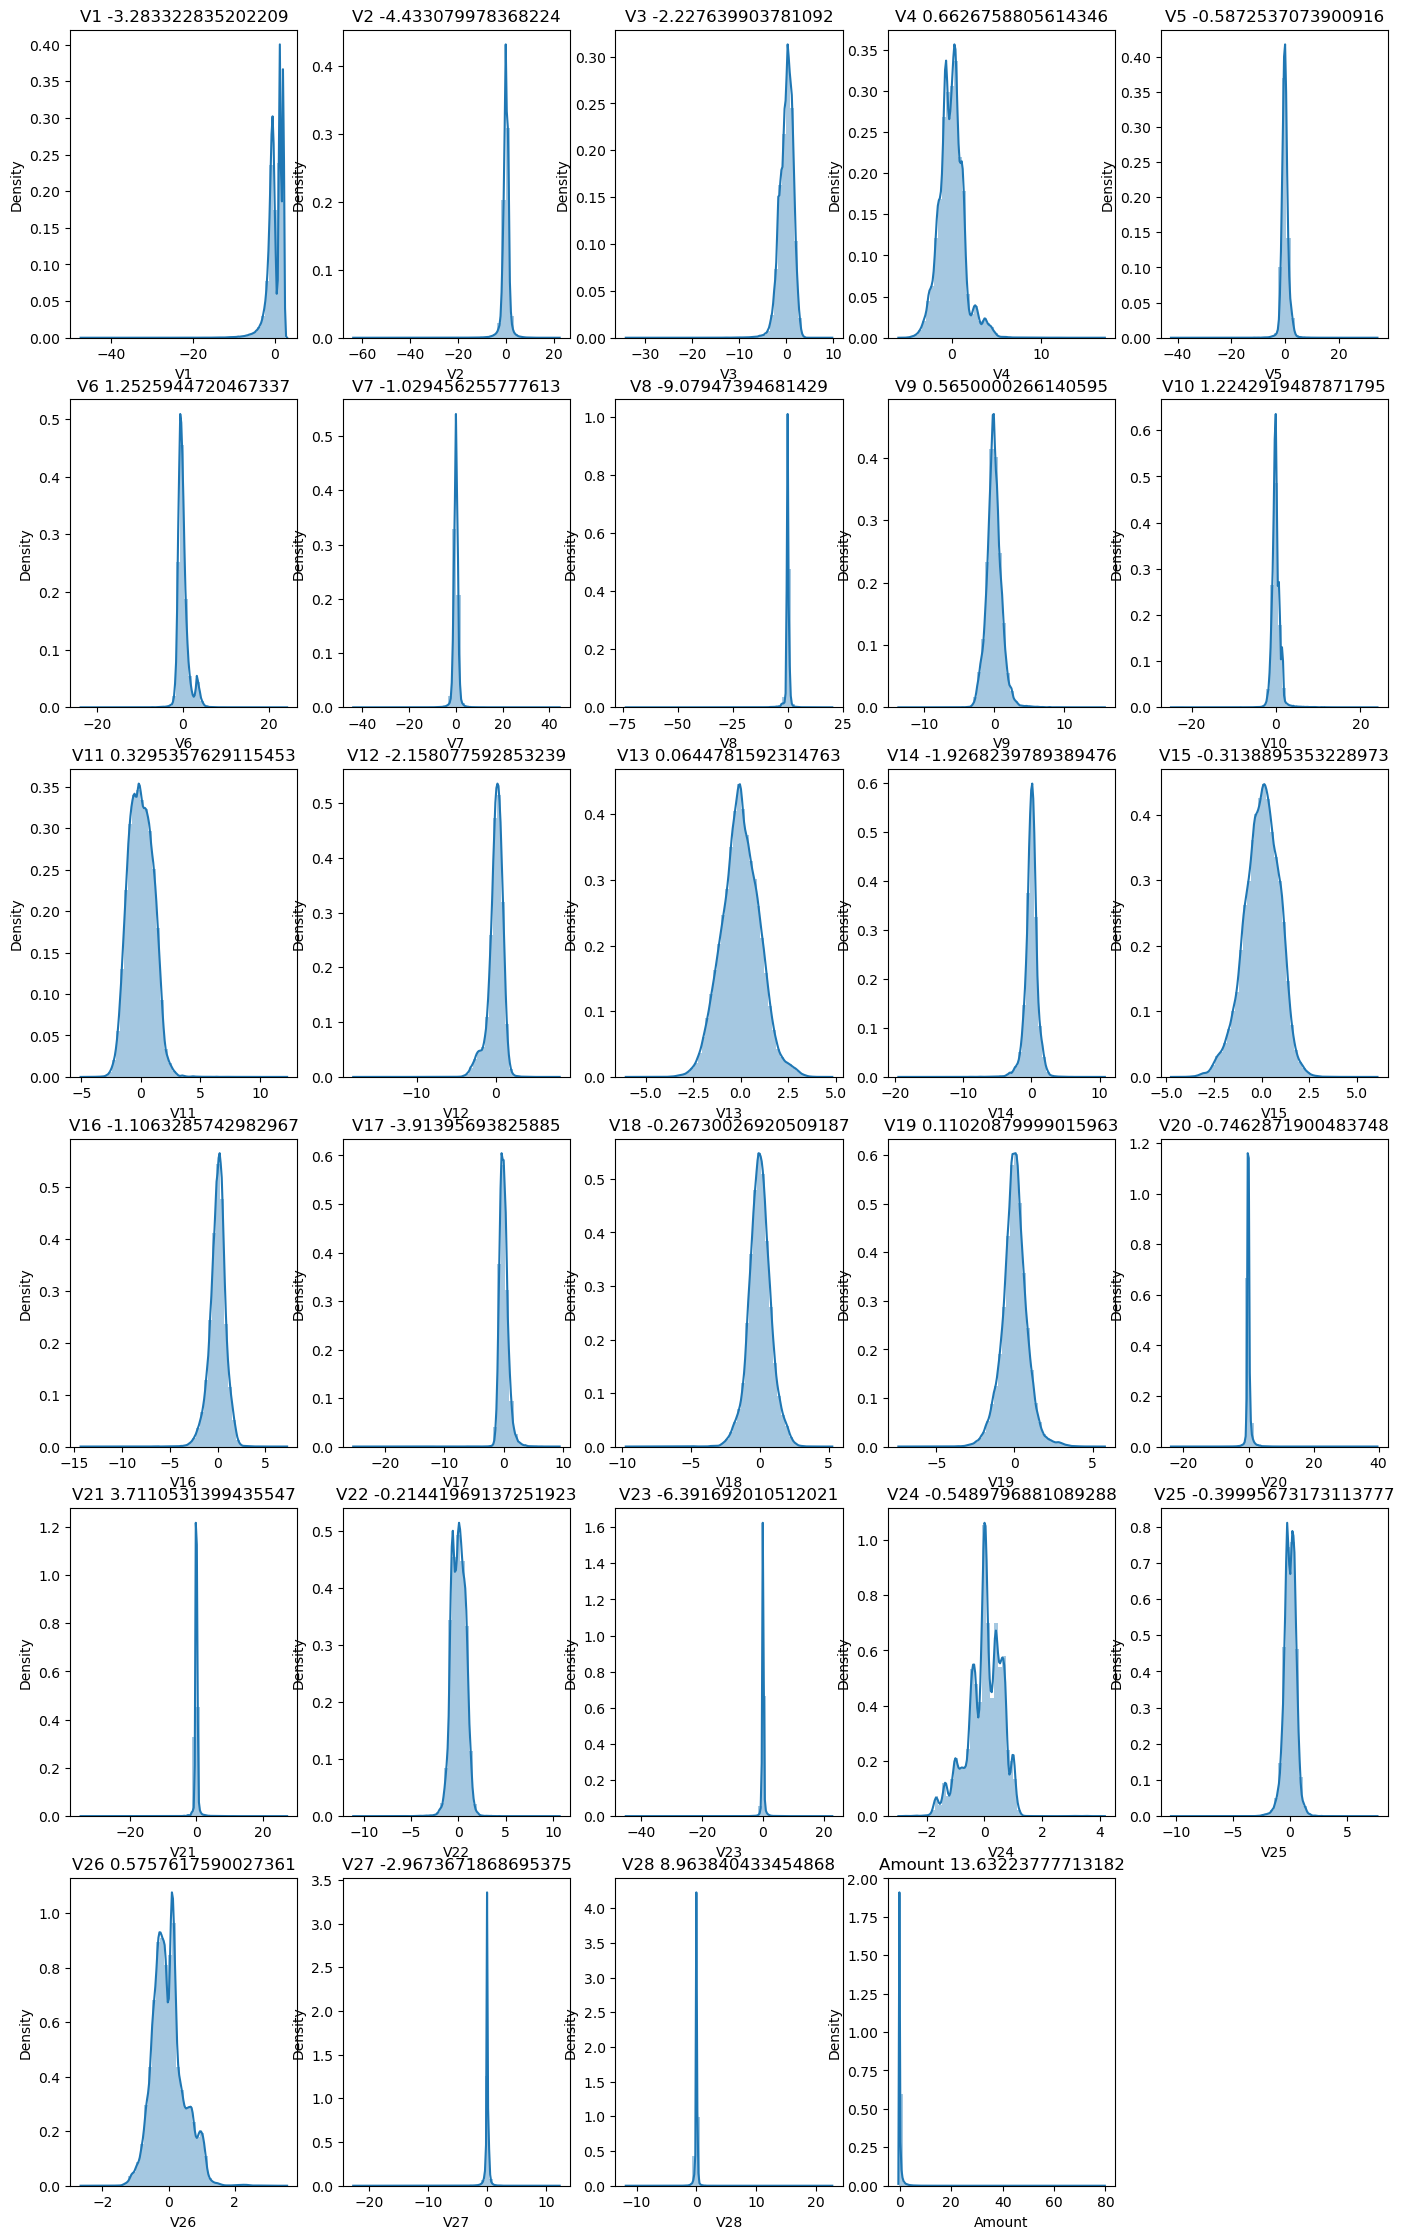

In [38]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Nhìn vào đồ thị, chúng ta thấy rằng có nhiều biến số bị sai lệch nặng. Tiếp theo, ta sẽ giảm thiểu độ lệch cho các biến đó để đưa chúng vào phân phối chuẩn - `normal distribution`.

**Mitigate skweness with PowerTransformer**

In [39]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [40]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

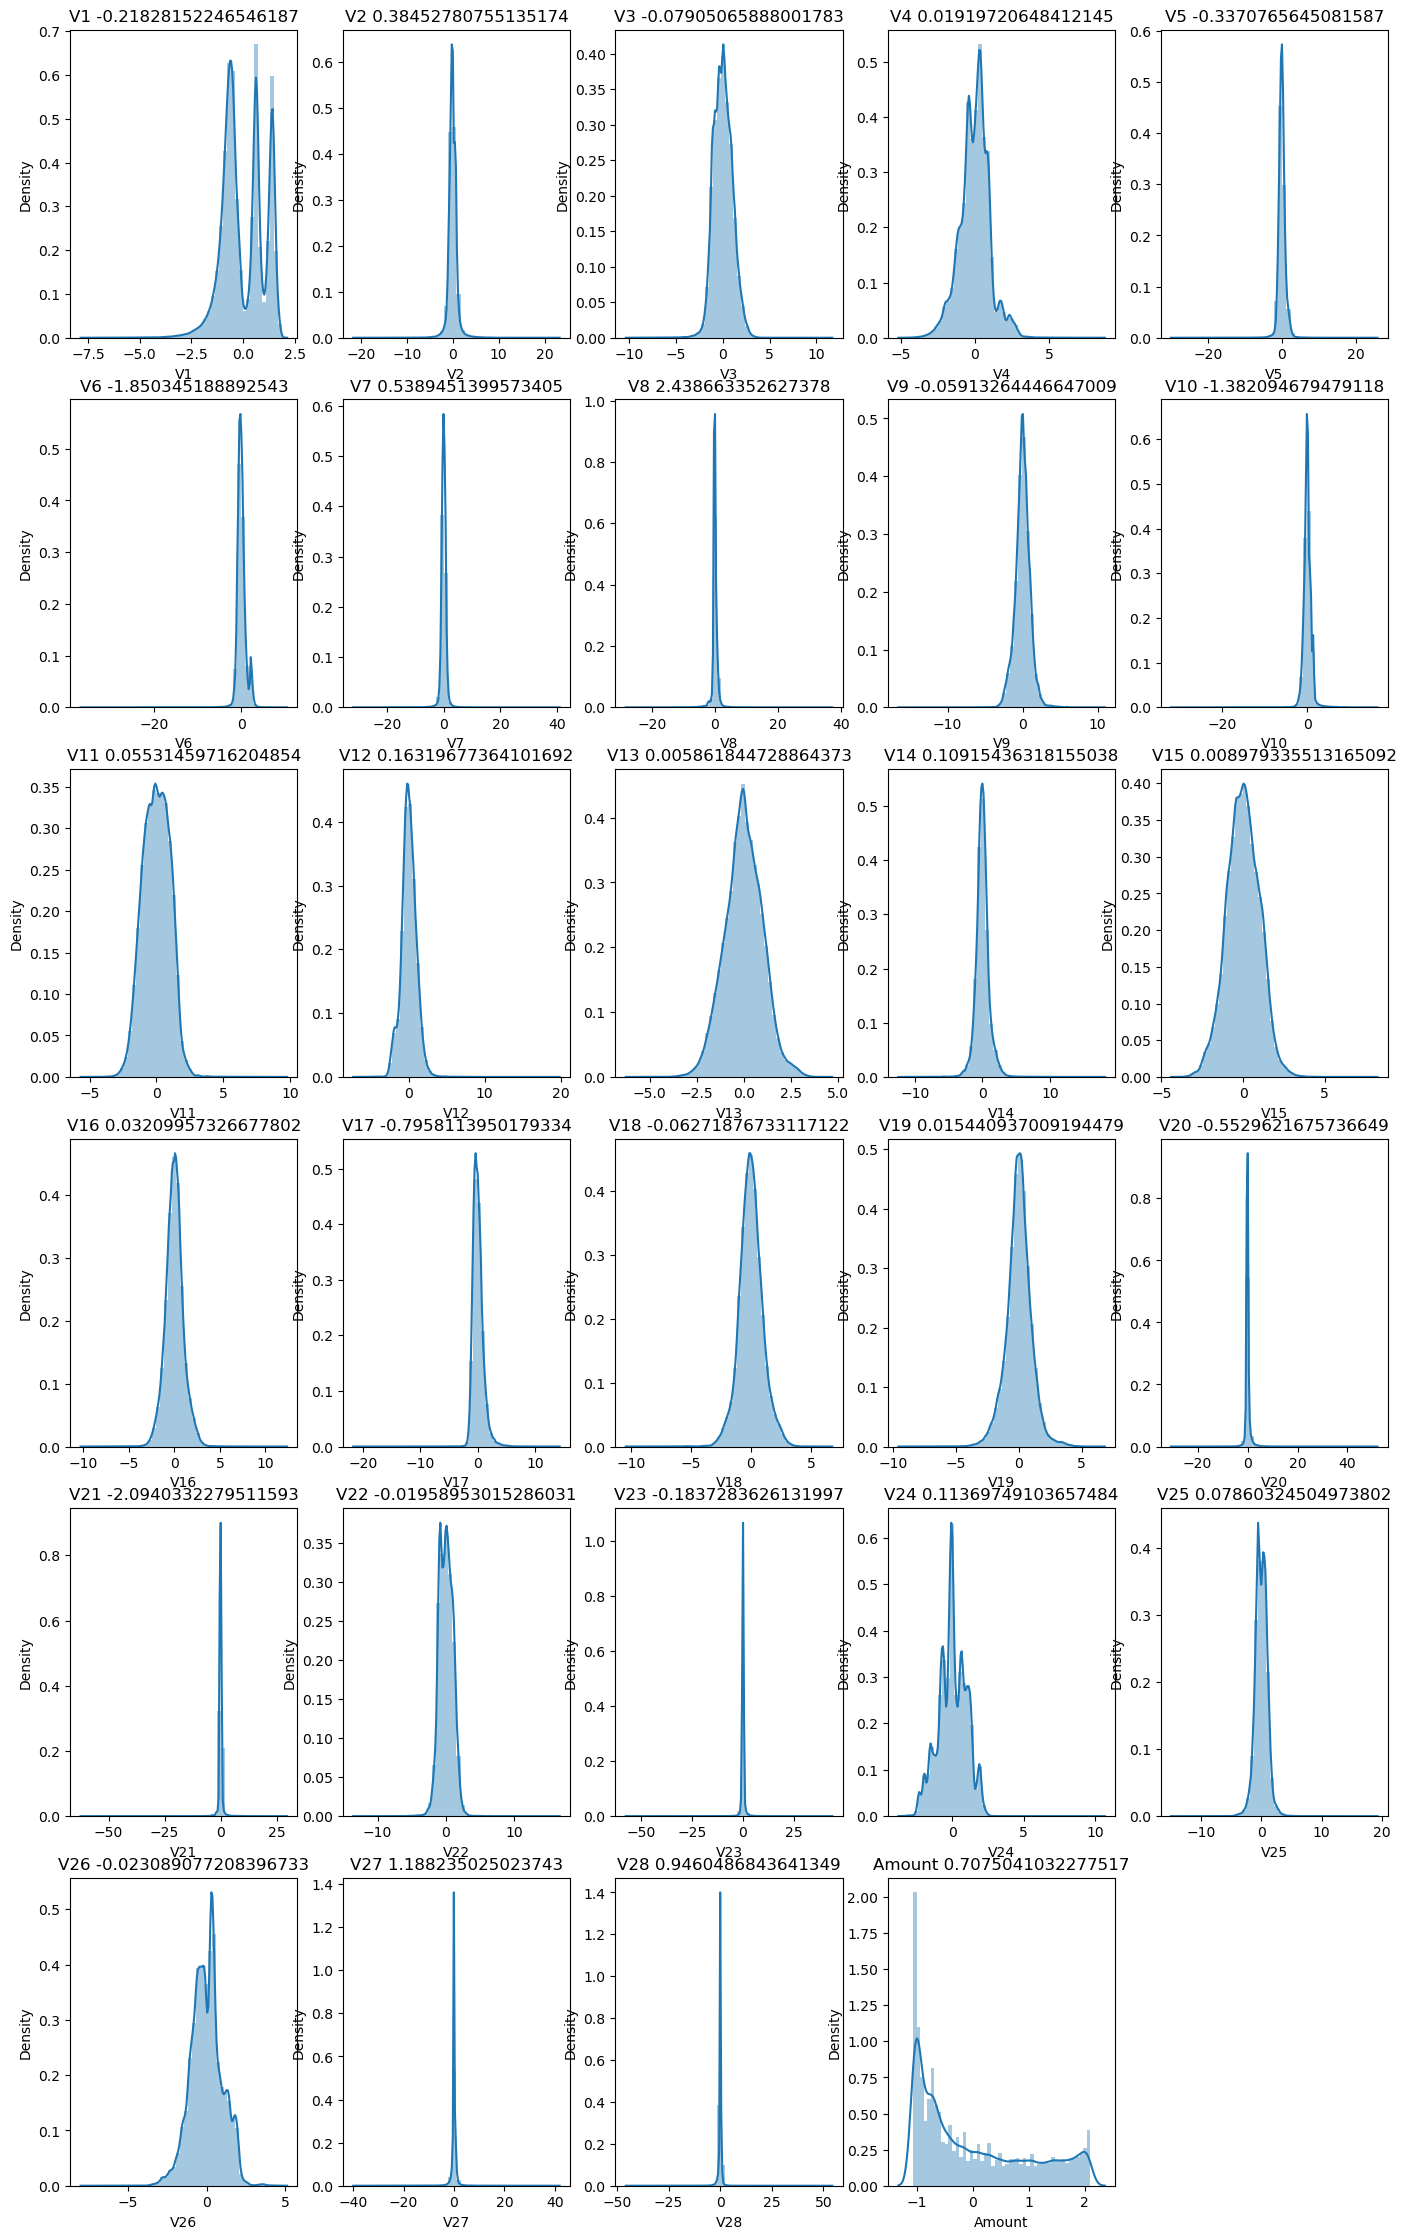

In [41]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

**Nhận xét:** Bây giờ chúng ta có thể thấy rằng tất cả các biến đều có phân phối chuẩn sau khi biến đổi.

<a class="anchor" id="4"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">4. MODEL BUILDING</p>

[**Table of Contents**](#0.1)

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'], 
                yticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

### 4.1 Logistic Regression <a class="anchor" id="4.1"></a>

**Training the Logistic Regression on the Training set**

In [44]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

In [45]:
# Train Score
train_score = LR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9992


**Testing the Logistic Regression on the Testing set**

In [46]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.6190
Precision score: 0.8835
F1-Score: 0.7280
Accuracy score: 0.9992


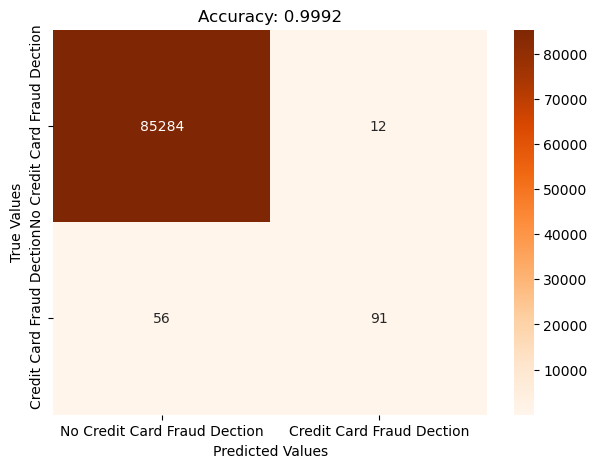



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9992**.
+ Score của tập Test là **0.9992**.
+ Mô hình **Logistic Regression** có độ chính xác gần như tuyệt đối.

### 4.2 Naive Bayes <a class="anchor" id="4.2"></a>

**Training the Naive Bayes on the Training set**

In [48]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)

In [49]:
# Train Score
train_score = NB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9779


**Testing the Naive Bayes on the Testing set**

In [50]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.8163
Precision score: 0.0617
F1-Score: 0.1147
Accuracy score: 0.9783


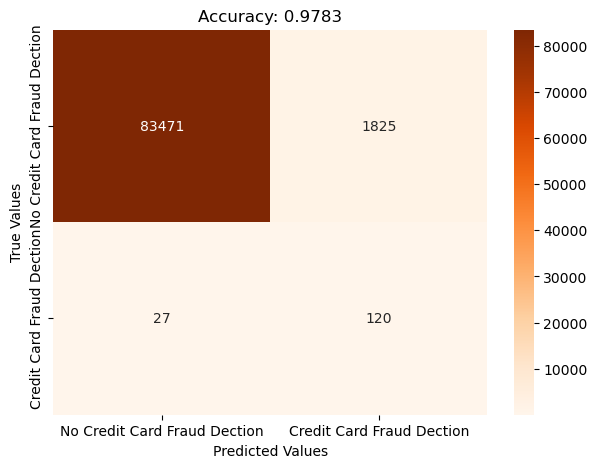



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.82      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.90      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [51]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9779**.
+ Score của tập Test là **0.9783**.
+ Độ chính xác của mô hình rất cao.

### 4.3 KNN <a class="anchor" id="4.3"></a>

**Training the KNN on the Training set**

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)

In [53]:
# Train Score
train_score = KNN_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9996


**Testing the KNN on the Testing set**

In [54]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7211
Precision score: 0.9217
F1-Score: 0.8092
Accuracy score: 0.9994


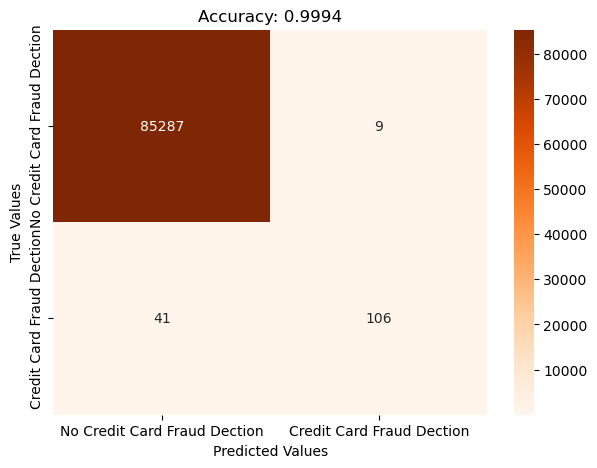



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.72      0.81       147

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [55]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9996**.
+ Score của tập Test là **0.9994**.

### 4.4 Decision Tree <a class="anchor" id="4.4"></a>

**Training Decision Tree Classification on Train set**

In [56]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)

In [57]:
# Train Score
train_score = DTR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


**Testing Decision Tree Classification on the Testing set**

In [58]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7415
Precision score: 0.7956
F1-Score: 0.7676
Accuracy score: 0.9992


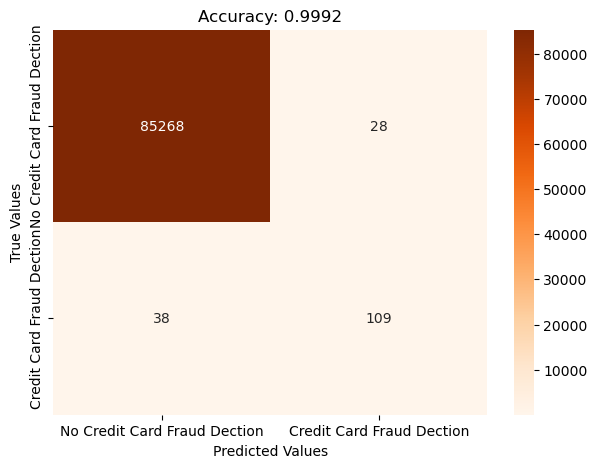



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.74      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [59]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **1.0000**.
+ Score của tập Test là **0.9992**.

### 4.5 Random Forest <a class="anchor" id="4.5"></a>

**Training the Random Forest Classification model on the Training set**

In [60]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)

In [61]:
# Train Score
train_score = RF_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9999


**Testing the Random Forest Classification model on the Testing set**

In [62]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7483
Precision score: 0.9402
F1-Score: 0.8333
Accuracy score: 0.9995


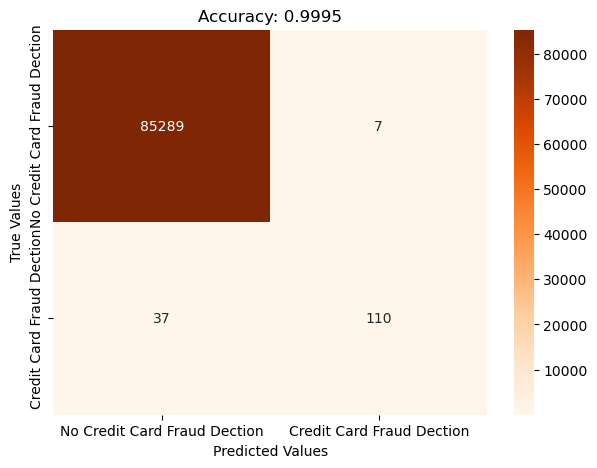



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [63]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9999**.
+ Score của tập Test là **0.9995**.

### 4.6 SVM <a class="anchor" id="4.6"></a>

**Training the SVM on the Training set**

In [64]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
acc6 = accuracy_score(y_test, y_pred)

In [65]:
# Train Score
train_score = SVM_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9994


**Testing the SVM model on the Testing set**

In [66]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7891
Precision score: 0.8345
F1-Score: 0.8112
Accuracy score: 0.9994


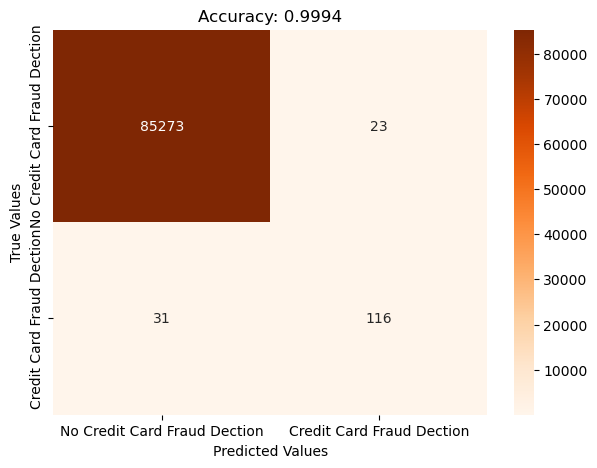



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.79      0.81       147

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [67]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **0.9994**.
+ Score của tập Test là **0.9994**.

### 4.7 XGBoost <a class="anchor" id="4.7"></a>

**Training the XGBoost model on the Training set**

In [68]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
acc7 = accuracy_score(y_test, y_pred)

In [69]:
# Train Score
train_score = XGB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


**Testing the XGBoost model on the Testing set**

In [70]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7823
Precision score: 0.9350
F1-Score: 0.8519
Accuracy score: 0.9995


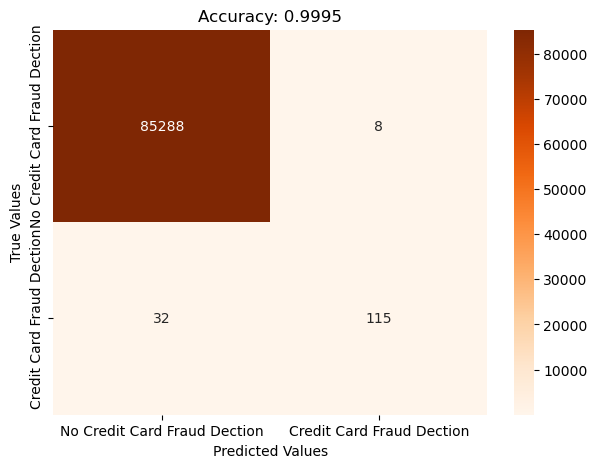



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [71]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **1.0000**.
+ Score của tập Test là **0.9995**.

### 4.8 CatBoost <a class="anchor" id="4.8"></a>

**Training CatBoost on the Training set**

In [72]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
acc8 = accuracy_score(y_test, y_pred)

Learning rate set to 0.098829
0:	learn: 0.3949853	total: 77.6ms	remaining: 1m 17s
1:	learn: 0.2054624	total: 87.1ms	remaining: 43.5s
2:	learn: 0.1138704	total: 97.1ms	remaining: 32.3s
3:	learn: 0.0644692	total: 108ms	remaining: 26.9s
4:	learn: 0.0379774	total: 119ms	remaining: 23.7s
5:	learn: 0.0247240	total: 130ms	remaining: 21.6s
6:	learn: 0.0166013	total: 142ms	remaining: 20.2s
7:	learn: 0.0118448	total: 153ms	remaining: 19s
8:	learn: 0.0088594	total: 164ms	remaining: 18.1s
9:	learn: 0.0069839	total: 196ms	remaining: 19.4s
10:	learn: 0.0057347	total: 209ms	remaining: 18.8s
11:	learn: 0.0047972	total: 221ms	remaining: 18.2s
12:	learn: 0.0042639	total: 233ms	remaining: 17.7s
13:	learn: 0.0038359	total: 246ms	remaining: 17.3s
14:	learn: 0.0035837	total: 260ms	remaining: 17.1s
15:	learn: 0.0033498	total: 274ms	remaining: 16.9s
16:	learn: 0.0031721	total: 294ms	remaining: 17s
17:	learn: 0.0030372	total: 314ms	remaining: 17.1s
18:	learn: 0.0028936	total: 347ms	remaining: 17.9s
19:	learn: 

163:	learn: 0.0010931	total: 2.28s	remaining: 11.6s
164:	learn: 0.0010882	total: 2.29s	remaining: 11.6s
165:	learn: 0.0010866	total: 2.3s	remaining: 11.6s
166:	learn: 0.0010838	total: 2.31s	remaining: 11.6s
167:	learn: 0.0010807	total: 2.33s	remaining: 11.5s
168:	learn: 0.0010784	total: 2.34s	remaining: 11.5s
169:	learn: 0.0010691	total: 2.36s	remaining: 11.5s
170:	learn: 0.0010652	total: 2.37s	remaining: 11.5s
171:	learn: 0.0010640	total: 2.38s	remaining: 11.5s
172:	learn: 0.0010619	total: 2.39s	remaining: 11.4s
173:	learn: 0.0010574	total: 2.4s	remaining: 11.4s
174:	learn: 0.0010548	total: 2.42s	remaining: 11.4s
175:	learn: 0.0010523	total: 2.44s	remaining: 11.4s
176:	learn: 0.0010509	total: 2.45s	remaining: 11.4s
177:	learn: 0.0010486	total: 2.46s	remaining: 11.4s
178:	learn: 0.0010470	total: 2.47s	remaining: 11.3s
179:	learn: 0.0010453	total: 2.5s	remaining: 11.4s
180:	learn: 0.0010429	total: 2.51s	remaining: 11.4s
181:	learn: 0.0010421	total: 2.52s	remaining: 11.3s
182:	learn: 0.0

328:	learn: 0.0006445	total: 4.22s	remaining: 8.62s
329:	learn: 0.0006419	total: 4.24s	remaining: 8.61s
330:	learn: 0.0006390	total: 4.25s	remaining: 8.59s
331:	learn: 0.0006300	total: 4.26s	remaining: 8.58s
332:	learn: 0.0006280	total: 4.27s	remaining: 8.56s
333:	learn: 0.0006232	total: 4.29s	remaining: 8.54s
334:	learn: 0.0006165	total: 4.3s	remaining: 8.53s
335:	learn: 0.0006143	total: 4.31s	remaining: 8.51s
336:	learn: 0.0006106	total: 4.32s	remaining: 8.49s
337:	learn: 0.0006086	total: 4.33s	remaining: 8.48s
338:	learn: 0.0006046	total: 4.34s	remaining: 8.46s
339:	learn: 0.0005963	total: 4.35s	remaining: 8.45s
340:	learn: 0.0005954	total: 4.36s	remaining: 8.43s
341:	learn: 0.0005947	total: 4.37s	remaining: 8.41s
342:	learn: 0.0005902	total: 4.38s	remaining: 8.4s
343:	learn: 0.0005879	total: 4.4s	remaining: 8.38s
344:	learn: 0.0005860	total: 4.41s	remaining: 8.37s
345:	learn: 0.0005830	total: 4.42s	remaining: 8.35s
346:	learn: 0.0005814	total: 4.43s	remaining: 8.34s
347:	learn: 0.0

491:	learn: 0.0003360	total: 6.27s	remaining: 6.47s
492:	learn: 0.0003354	total: 6.29s	remaining: 6.47s
493:	learn: 0.0003350	total: 6.3s	remaining: 6.45s
494:	learn: 0.0003320	total: 6.31s	remaining: 6.44s
495:	learn: 0.0003306	total: 6.33s	remaining: 6.43s
496:	learn: 0.0003297	total: 6.34s	remaining: 6.41s
497:	learn: 0.0003292	total: 6.35s	remaining: 6.4s
498:	learn: 0.0003285	total: 6.36s	remaining: 6.39s
499:	learn: 0.0003269	total: 6.38s	remaining: 6.38s
500:	learn: 0.0003261	total: 6.39s	remaining: 6.36s
501:	learn: 0.0003254	total: 6.4s	remaining: 6.35s
502:	learn: 0.0003230	total: 6.42s	remaining: 6.34s
503:	learn: 0.0003227	total: 6.43s	remaining: 6.33s
504:	learn: 0.0003216	total: 6.44s	remaining: 6.31s
505:	learn: 0.0003199	total: 6.45s	remaining: 6.3s
506:	learn: 0.0003194	total: 6.46s	remaining: 6.29s
507:	learn: 0.0003186	total: 6.48s	remaining: 6.27s
508:	learn: 0.0003179	total: 6.49s	remaining: 6.26s
509:	learn: 0.0003173	total: 6.5s	remaining: 6.25s
510:	learn: 0.000

656:	learn: 0.0001809	total: 8.3s	remaining: 4.33s
657:	learn: 0.0001806	total: 8.31s	remaining: 4.32s
658:	learn: 0.0001802	total: 8.32s	remaining: 4.31s
659:	learn: 0.0001798	total: 8.33s	remaining: 4.29s
660:	learn: 0.0001784	total: 8.35s	remaining: 4.28s
661:	learn: 0.0001779	total: 8.36s	remaining: 4.27s
662:	learn: 0.0001773	total: 8.37s	remaining: 4.25s
663:	learn: 0.0001762	total: 8.38s	remaining: 4.24s
664:	learn: 0.0001751	total: 8.39s	remaining: 4.23s
665:	learn: 0.0001746	total: 8.4s	remaining: 4.21s
666:	learn: 0.0001738	total: 8.41s	remaining: 4.2s
667:	learn: 0.0001734	total: 8.42s	remaining: 4.19s
668:	learn: 0.0001723	total: 8.44s	remaining: 4.18s
669:	learn: 0.0001718	total: 8.45s	remaining: 4.16s
670:	learn: 0.0001717	total: 8.46s	remaining: 4.15s
671:	learn: 0.0001712	total: 8.47s	remaining: 4.14s
672:	learn: 0.0001705	total: 8.49s	remaining: 4.12s
673:	learn: 0.0001696	total: 8.5s	remaining: 4.11s
674:	learn: 0.0001694	total: 8.51s	remaining: 4.1s
675:	learn: 0.000

829:	learn: 0.0001170	total: 10.3s	remaining: 2.12s
830:	learn: 0.0001167	total: 10.4s	remaining: 2.11s
831:	learn: 0.0001166	total: 10.4s	remaining: 2.09s
832:	learn: 0.0001164	total: 10.4s	remaining: 2.08s
833:	learn: 0.0001162	total: 10.4s	remaining: 2.07s
834:	learn: 0.0001161	total: 10.4s	remaining: 2.06s
835:	learn: 0.0001160	total: 10.4s	remaining: 2.04s
836:	learn: 0.0001157	total: 10.4s	remaining: 2.03s
837:	learn: 0.0001156	total: 10.4s	remaining: 2.02s
838:	learn: 0.0001154	total: 10.4s	remaining: 2s
839:	learn: 0.0001151	total: 10.5s	remaining: 1.99s
840:	learn: 0.0001144	total: 10.5s	remaining: 1.98s
841:	learn: 0.0001138	total: 10.5s	remaining: 1.97s
842:	learn: 0.0001133	total: 10.5s	remaining: 1.95s
843:	learn: 0.0001131	total: 10.5s	remaining: 1.94s
844:	learn: 0.0001130	total: 10.5s	remaining: 1.93s
845:	learn: 0.0001128	total: 10.5s	remaining: 1.92s
846:	learn: 0.0001127	total: 10.5s	remaining: 1.9s
847:	learn: 0.0001123	total: 10.5s	remaining: 1.89s
848:	learn: 0.00

In [73]:
# Train Score
train_score = catboost_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


**Testing the CatBoost model on the Testing set**

In [74]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7755
Precision score: 0.9421
F1-Score: 0.8507
Accuracy score: 0.9995


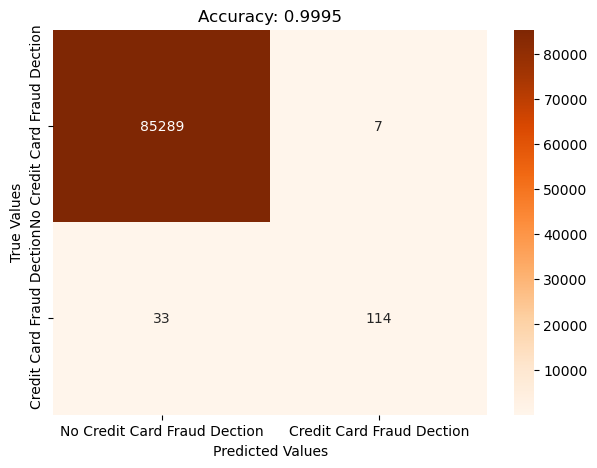



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [75]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:**
+ Score của tập Train là **1.0000**.
+ Score của tập Test là **0.9995**.

### 4.9 AdaBoost <a class="anchor" id="4.9"></a>

**Training the XGBoost model on the Training set**

In [76]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
acc9 = accuracy_score(y_test, y_pred)

In [77]:
# Train Score
train_score = adaboost_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9993


**Testing the CatBoost model on the Testing set**

In [78]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.6667
Precision score: 0.8305
F1-Score: 0.7396
Accuracy score: 0.9992


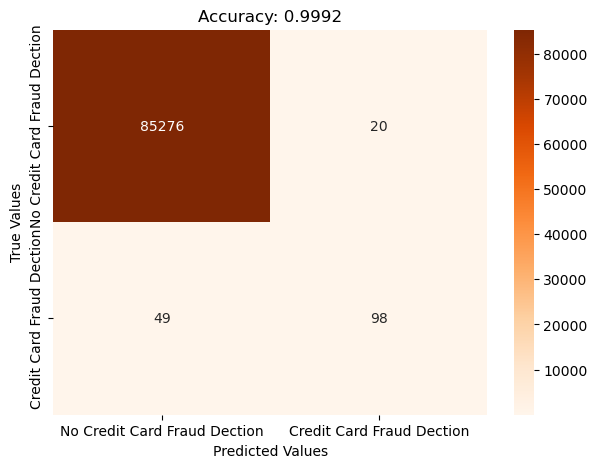



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.67      0.74       147

    accuracy                           1.00     85443
   macro avg       0.91      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [79]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

**Nhận xét:** 

### 4.10 ANN <a class="anchor" id="4.10"></a>

In [80]:
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-02-17 14:11:09.120855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:
ANN_model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(29,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

2023-02-17 14:11:12.045591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [82]:
ANN_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
6231/6231 [==============================] - 4s 650us/step - loss: 0.0147 - accuracy: 0.9976
Epoch 2/200
6231/6231 [==============================] - 4s 652us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 3/200
6231/6231 [==============================] - 4s 659us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 4/200
6231/6231 [==============================] - 4s 668us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/200
6231/6231 [==============================] - 4s 652us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 6/200
6231/6231 [==============================] - 4s 656us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 7/200
6231/6231 [==============================] - 4s 653us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 8/200
6231/6231 [==============================] - 4s 656us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 9/200
6231/6231 [==============================] - 4s 657us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 10/200
6231/6231 [==============================]

Epoch 77/200
6231/6231 [==============================] - 4s 656us/step - loss: 5.9485e-04 - accuracy: 0.9998
Epoch 78/200
6231/6231 [==============================] - 4s 649us/step - loss: 5.2088e-04 - accuracy: 0.9998
Epoch 79/200
6231/6231 [==============================] - 4s 670us/step - loss: 5.9973e-04 - accuracy: 0.9998
Epoch 80/200
6231/6231 [==============================] - 4s 657us/step - loss: 4.4195e-04 - accuracy: 0.9999
Epoch 81/200
6231/6231 [==============================] - 4s 664us/step - loss: 5.0081e-04 - accuracy: 0.9998
Epoch 82/200
6231/6231 [==============================] - 4s 637us/step - loss: 4.9783e-04 - accuracy: 0.9998
Epoch 83/200
6231/6231 [==============================] - 4s 635us/step - loss: 5.8262e-04 - accuracy: 0.9998
Epoch 84/200
6231/6231 [==============================] - 4s 639us/step - loss: 4.5245e-04 - accuracy: 0.9998
Epoch 85/200
6231/6231 [==============================] - 4s 642us/step - loss: 5.2050e-04 - accuracy: 0.9998
Epoch 86/2

6231/6231 [==============================] - 4s 674us/step - loss: 3.0899e-04 - accuracy: 0.9999
Epoch 152/200
6231/6231 [==============================] - 4s 649us/step - loss: 2.1402e-04 - accuracy: 0.9999
Epoch 153/200
6231/6231 [==============================] - 4s 651us/step - loss: 3.7150e-04 - accuracy: 0.9999
Epoch 154/200
6231/6231 [==============================] - 4s 632us/step - loss: 3.6836e-04 - accuracy: 0.9999
Epoch 155/200
6231/6231 [==============================] - 4s 636us/step - loss: 2.3502e-04 - accuracy: 0.9999
Epoch 156/200
6231/6231 [==============================] - 4s 636us/step - loss: 3.5118e-04 - accuracy: 0.9999
Epoch 157/200
6231/6231 [==============================] - 4s 642us/step - loss: 2.4190e-04 - accuracy: 0.9999
Epoch 158/200
6231/6231 [==============================] - 4s 638us/step - loss: 2.6421e-04 - accuracy: 0.9999
Epoch 159/200
6231/6231 [==============================] - 4s 638us/step - loss: 3.2425e-04 - accuracy: 0.9999
Epoch 160/200
6

In [83]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,5))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

**Train Predictions**

6231/6231 [==============================] - 3s 405us/step


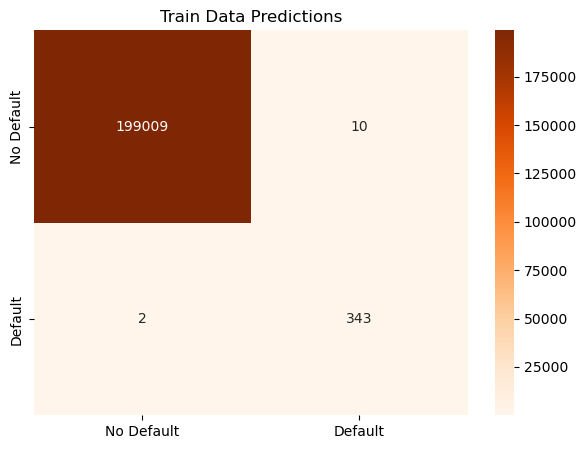



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199019
           1       0.97      0.99      0.98       345

    accuracy                           1.00    199364
   macro avg       0.99      1.00      0.99    199364
weighted avg       1.00      1.00      1.00    199364



In [84]:
y_train_pred = predict(ANN_model, X_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

In [85]:
# Train score
print('Recall score: %0.4f'% recall_score(y_train, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train, y_train_pred))

Recall score: 0.9942
Precision score: 0.9717
F1-Score: 0.9828
Accuracy score: 0.9999


**Test Predictions**

In [87]:
y_pred = predict(ANN_model, X_test)
acc10 = accuracy_score(y_test, y_pred)

2671/2671 [==============================] - 1s 416us/step


In [88]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.7891
Precision score: 0.7785
F1-Score: 0.7838
Accuracy score: 0.9993


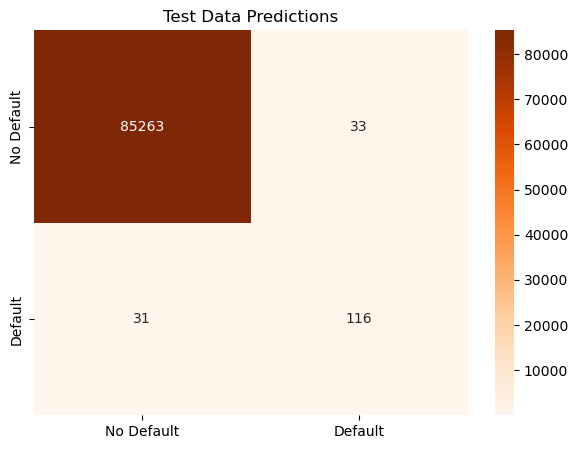



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.79      0.78       147

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [89]:
predict_graph(y_test, y_pred, 'Test Data Predictions')

**Nhận xét:**
+ Score của tập Train là **0.9999**.
+ Score của tập Test là **0.9993**.

<a class="anchor" id="5"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">5. RESULT</p>

[**Table of Contents**](#0.1)

### Compare the accuracy of the models on the training set

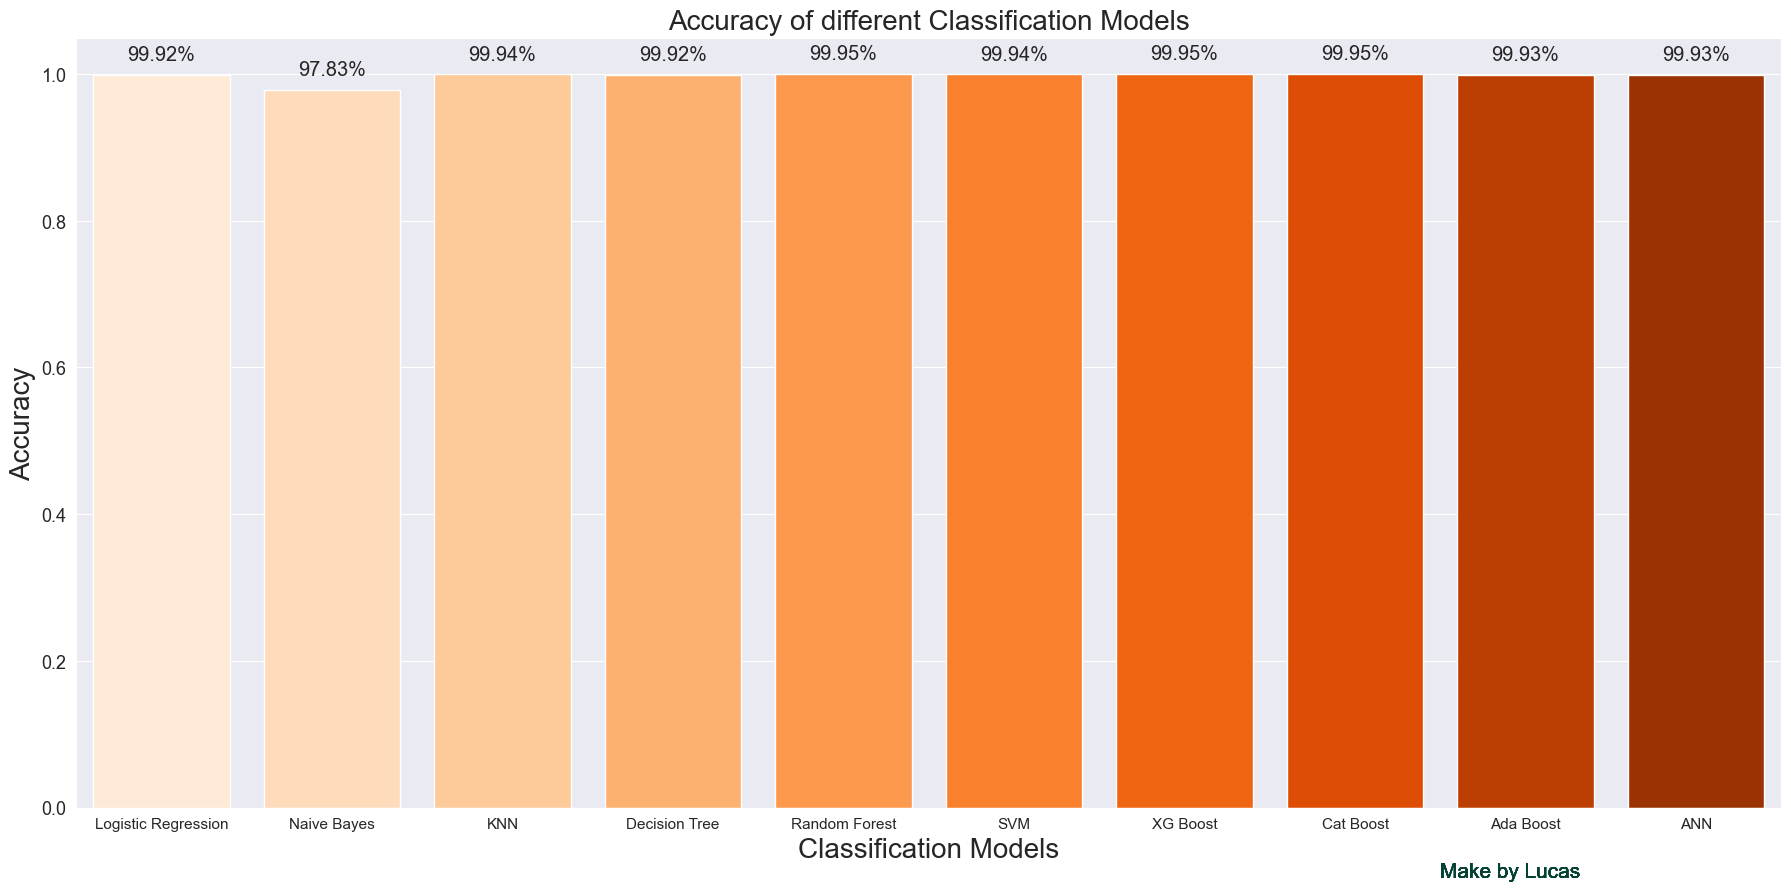

In [90]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
mylist.append(acc9)
mylist2.append("Ada Boost")
mylist.append(acc10)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "Oranges", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

**Nhận xét:** Tất cả các mô hình xây dựng đều có độ chính xác rất cao (đều trên 99%). Riêng mô hình Naive Bayes là thấp nhất (auc = 97.83%).

### ROC Curve and Area Under the Curve

In [91]:
from sklearn.metrics import roc_curve, auc

**ROC - Logistic Regression**

In [92]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

**ROC - Naive Bayes**

In [93]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

**ROC - KNN**

In [94]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

**ROC - Decision Tree**

In [95]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

**ROC - Random Forest**

In [96]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

**ROC - SVM**

In [97]:
y_pred_svm = SVM_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

**ROC - XG Boost**

In [98]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

**ROC - CatBoost**

In [99]:
y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

**ROC - AdaBoost**

In [100]:
y_pred_adaboost = adaboost_model.predict_proba(X_test)[:,1]
adaboost_fpr, adaboost_tpr, threshold = roc_curve(y_test, y_pred_adaboost)
auc_adaboost = auc(adaboost_fpr, adaboost_tpr)

**ROC - ANN**

In [101]:
y_pred_ann = ANN_model.predict(X_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

2671/2671 [==============================] - 1s 385us/step


**ROC - Plotting Graph**

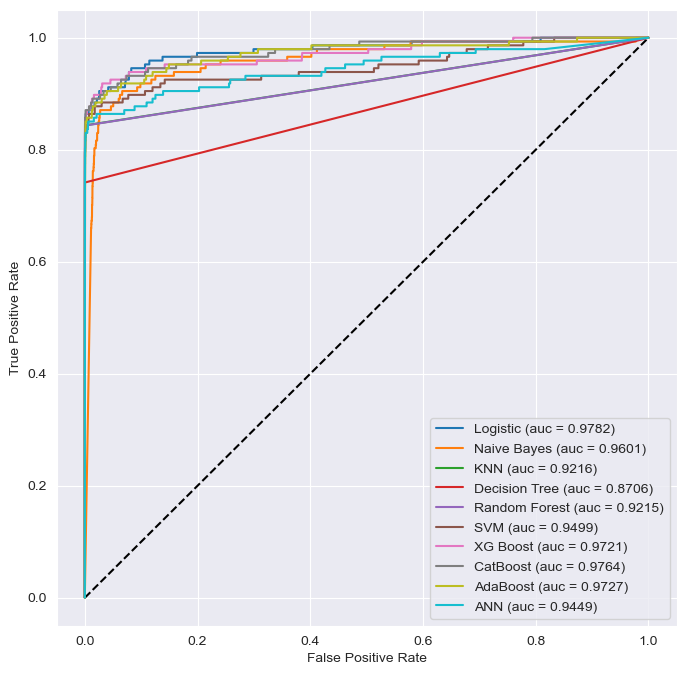

In [102]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.4f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.4f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.4f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.4f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.4f)' % auc_catboost)
# AdaBoost
plt.plot(adaboost_fpr, adaboost_tpr, linestyle='-', label='AdaBoost (auc = %0.4f)' % auc_adaboost)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.4f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

**Nhận xét:** ROC của Logistic Regression cao nhất (**auc = 97.82%**).

### Probability Threshold

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
def Threshold_PrecisionRecall(y, y_prob):
    # calucate roc curves
    precision, recall, threshold = precision_recall_curve(y, y_prob)
    scores = (2*precision*recall)/(precision+recall)
    pos = np.argmax(scores)
    return threshold[pos], scores[pos]

In [ ]:
# Điều chỉnh ngưỡng
Threshold_PrecisionRecall(y_test, LR_model.predict_proba(X_test)[:,1])

**Nhận xét:** Threshold tối ưu là **0.089576**.

In [ ]:
def Threshold_ROC(y, y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(y, y_prob)
    scores = tpr-fpr
    pos = np.argmax(scores)
    return threshold[pos], scores[pos]

In [ ]:
Threshold_ROC(y_test, LR_model.predict_proba(X_test)[:,1])

**Nhận xét:** Threshold ROC tối ưu là **0.00225**.

<a class="anchor" id="6"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">6. CONCLUSIONS</p>

[**Table of Contents**](#0.1)

Sự phát triển của [công nghệ IoT](https://aws.amazon.com/vi/what-is/iot/) và dựa trên dữ liệu tài chính ảnh hưởng nghiêm trọng đến cuộc sống và hành vi hàng ngày của khách hàng. Thanh toán kỹ thuật số (Digital payments) đang lan rộng nhanh chóng và trở nên quan trọng, chủ yếu kể từ sau đại dịch COVID-19. Việc sử dụng những tiến bộ gần đây, cụ thể là AI, dữ liệu lớn (BigData) và điện toán đám mây (cloud computing) đang thu hút sự quan tâm lớn từ các nhà nghiên cứu. Mặc dù rất nhiều nghiên cứu đã được thực hiện trong lĩnh vực này trong những năm gần đây, nhưng các cuộc điều tra toàn diện cực kỳ hạn chế cũng đã được thực hiện. Do đó, **Project** này nhằm mục đích đưa ra những phát hiện mới nhất và phù hợp nhất về phát hiện gian lận thẻ tín dụng (*credit card fraud detection*), tác động đến các công nghệ mới trong lĩnh vực này. 

Trong dự án này, tôi đã tìm hiểu về dữ liệu, kiểm tra sự mất cân bằng dữ liệu, trực quan hóa các tính năng và hiểu mối quan hệ giữa các tính năng khác nhau. Tôi nhận thấy rằng trong bộ dữ liệu cân bằng khi áp dụng kỹ thuật SMOTE, độ chính xác của các thuật toán Machine Learning được xây dựng có độ chính xác cao hơn. Ngoài ra, trong Project này, việc loại bỏ các giá trị ngoại lai (outlier) chưa được triển khai. Điều này có thể được thực hiện trong công việc trong tương lai và xem liệu điều đó có ảnh hưởng đến hiệu suất mô hình của chúng ta hay không.

Sau khi so sánh giữa các mô hình, kết quả được tìm thấy như sau:
+ **Mô hình tốt nhất**: Logistic Regression kết hợp với SMOTE
+ **Accuracy score** = 99,92%.
+ **ROC** có auc = 97,82%.

_______

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_Make by_**<span style="color:#034235;"> Lucas,</span>**

_______
### <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">END</p>

<p align="center">
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;" display = "block;">
</p>

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)

_______